
 Preparar los datos para el modelado (tratamiento, codificación, normalización).



In [3]:
# Preparando entorno, importando bibliotecas basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
datos = pd.read_csv('https://raw.githubusercontent.com/Nestoredh/CHALLENGE-TELECOM-X-ANALISIS-DE-EVASION-DE-CLIENTES-2-NESTORHERRERA/7f60a9de43c05e527a67eb9b540a3ce9a606fb61/Datos.csv')
datos.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [5]:
# en la varable Churn existen valores nan, por esa razon y para no afectar el resto de los valores, vamos a eliminar de nuestro data frame todos esos datos erroneos y trabjaremos con una base un poco mas reducida
datos = datos.dropna() #<-- eliminar datos nulos
datos = datos.reset_index(drop=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [6]:
# Transformar variables categóricas a formato numérico
columnas = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','InternetService', 'PaperlessBilling']
datos[columnas] = datos[columnas].replace({1: 'Yes', 0: 'No'})
datos['Contract'] = datos['Contract'].replace({'One year':'+One year', 'Two year':'+One year','Month-to-month':'+One year No'})
datos.sample(10)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily,TypeService
5204,No,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,+One year,No,Bank transfer (automatic),19.50,159.35,0.650000,No Internet Service
3814,Yes,Female,No,No,No,1,Yes,No,Yes,No,...,No,No,No,+One year No,Yes,Electronic check,70.60,70.60,2.353333,Fiber optic
6547,No,Male,No,No,No,11,Yes,No,Yes,No,...,No,Yes,No,+One year,Yes,Electronic check,61.25,729.95,2.041667,DSL
5650,No,Female,No,Yes,No,25,Yes,No,Yes,No,...,No,No,No,+One year No,Yes,Electronic check,74.60,1797.75,2.486667,Fiber optic
288,No,Male,Yes,No,No,9,Yes,No,Yes,No,...,Yes,No,No,+One year No,No,Mailed check,49.20,447.90,1.640000,DSL
4090,No,Female,No,Yes,No,68,Yes,Yes,Yes,Yes,...,No,Yes,Yes,+One year,Yes,Bank transfer (automatic),110.80,7553.60,3.693333,Fiber optic
6140,No,Female,No,No,No,4,Yes,No,Yes,No,...,No,No,Yes,+One year No,Yes,Credit card (automatic),82.85,319.60,2.761667,Fiber optic
2562,Yes,Male,No,Yes,No,4,Yes,No,Yes,No,...,Yes,No,No,+One year No,Yes,Mailed check,80.60,319.15,2.686667,Fiber optic
3475,No,Female,Yes,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,+One year,No,Mailed check,20.65,330.60,0.688333,No Internet Service
6510,Yes,Male,Yes,Yes,No,29,Yes,Yes,Yes,No,...,No,Yes,Yes,+One year No,Yes,Electronic check,94.45,2653.65,3.148333,Fiber optic


Separacion de variables

In [7]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [8]:
# Transformar variables categóricas a formato numérico
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.compose import make_column_transformer as MakeCT

columnas = X.columns
one_hot = MakeCT((OneHot(drop='if_binary'),
                ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod','TypeService']),
                 remainder='passthrough',
                 sparse_threshold=0,
                 force_int_remainder_cols=False)

X = one_hot.fit_transform(X)

In [9]:
one_hot.get_feature_names_out()

array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_Yes',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Yes',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotenc

In [10]:
datos_codificados =pd.DataFrame(X, columns=one_hot.get_feature_names_out())
col = ['onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__TypeService_No Internet Service',
       'onehotencoder__MultipleLines_No phone service']
datos_codificados.drop(col, axis=1, inplace=True)

datos_codificados.columns

Index(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_Yes',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes', 'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Yes',
       'onehotencoder__OnlineSecurity_No', 'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No', 'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_+One year No',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automat

In [11]:
datos_codificados.columns = datos_codificados.columns.str.replace('onehotencoder__', '').str.replace('remainder__', '')
datos_codificados = datos_codificados.rename(columns={'SeniorCitizen_Yes': '+65_YearsOld_Yes'})
datos_codificados = datos_codificados.rename(columns={'Contract_+One year No': 'Contract_LessOneYear_Yes'})
datos_codificados

,gender_Male,+65_YearsOld_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_No,OnlineSecurity_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TypeService_DSL,TypeService_Fiber optic,tenure,Charges.Monthly,Charges.Total,Charges.Daily
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,13.0,55.15,742.90,1.838333
7028,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,22.0,85.10,1873.70,2.836667
7029,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,50.30,92.75,1.676667
7030,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,67.0,67.85,4627.65,2.261667


In [12]:

columns =['gender_Male', '+65_YearsOld_Yes', 'Partner_Yes', 'Dependents_Yes',
          'PhoneService_Yes', 'InternetService_Yes', 'TypeService_DSL', 'TypeService_Fiber optic',
          'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
          'StreamingTV_Yes','StreamingMovies_Yes',
          'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
          'Contract_LessOneYear_Yes','tenure','Charges.Monthly']

In [13]:
datos_codificados = datos_codificados[columns]
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Male                              7032 non-null   float64
 1   +65_YearsOld_Yes                         7032 non-null   float64
 2   Partner_Yes                              7032 non-null   float64
 3   Dependents_Yes                           7032 non-null   float64
 4   PhoneService_Yes                         7032 non-null   float64
 5   InternetService_Yes                      7032 non-null   float64
 6   TypeService_DSL                          7032 non-null   float64
 7   TypeService_Fiber optic                  7032 non-null   float64
 8   OnlineSecurity_Yes                       7032 non-null   float64
 9   OnlineBackup_Yes                         7032 non-null   float64
 10  DeviceProtection_Yes                     7032 no

Tratamiento de varaible respuesta

In [14]:
y = y.rename('Canceled_Yes')
y = y.map({'Yes': 1, 'No': 0})
y

,Canceled_Yes
0,0
1,0
2,1
3,1
4,1
...,...
7027,0
7028,1
7029,0
7030,0



Proporción de Clientes por Cancelaciones (%):


,proportion
Canceled_Yes,
0,73.422
1,26.578


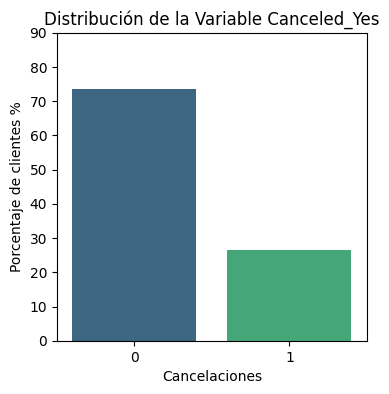

In [15]:
# Calcular la proporción de clientes que cancelaron (Churn = Yes) vs. los que no (Churn = No)
canceled_prop = y.value_counts(normalize=True) * 100

print("\nProporción de Clientes por Cancelaciones (%):")
display(round(canceled_prop,3))

# Opcional: Visualización del desbalance
plt.figure(figsize=(4, 4))
sns.barplot(x=canceled_prop.index, y=canceled_prop.values, hue=canceled_prop.index, palette='viridis', legend=False)
plt.title('Distribución de la Variable Canceled_Yes')
plt.xlabel('Cancelaciones')
plt.ylabel('Porcentaje de clientes %')
plt.yticks(range(0, 100, 10))
plt.show()

In [16]:
columns =['+65_YearsOld_Yes', 'Partner_Yes', 'Dependents_Yes',
          'InternetService_Yes', 'TypeService_DSL', 'TypeService_Fiber optic',
          'OnlineSecurity_Yes', 'TechSupport_Yes',
          'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
          'Contract_LessOneYear_Yes','tenure','Charges.Monthly']
X = datos_codificados[columns]

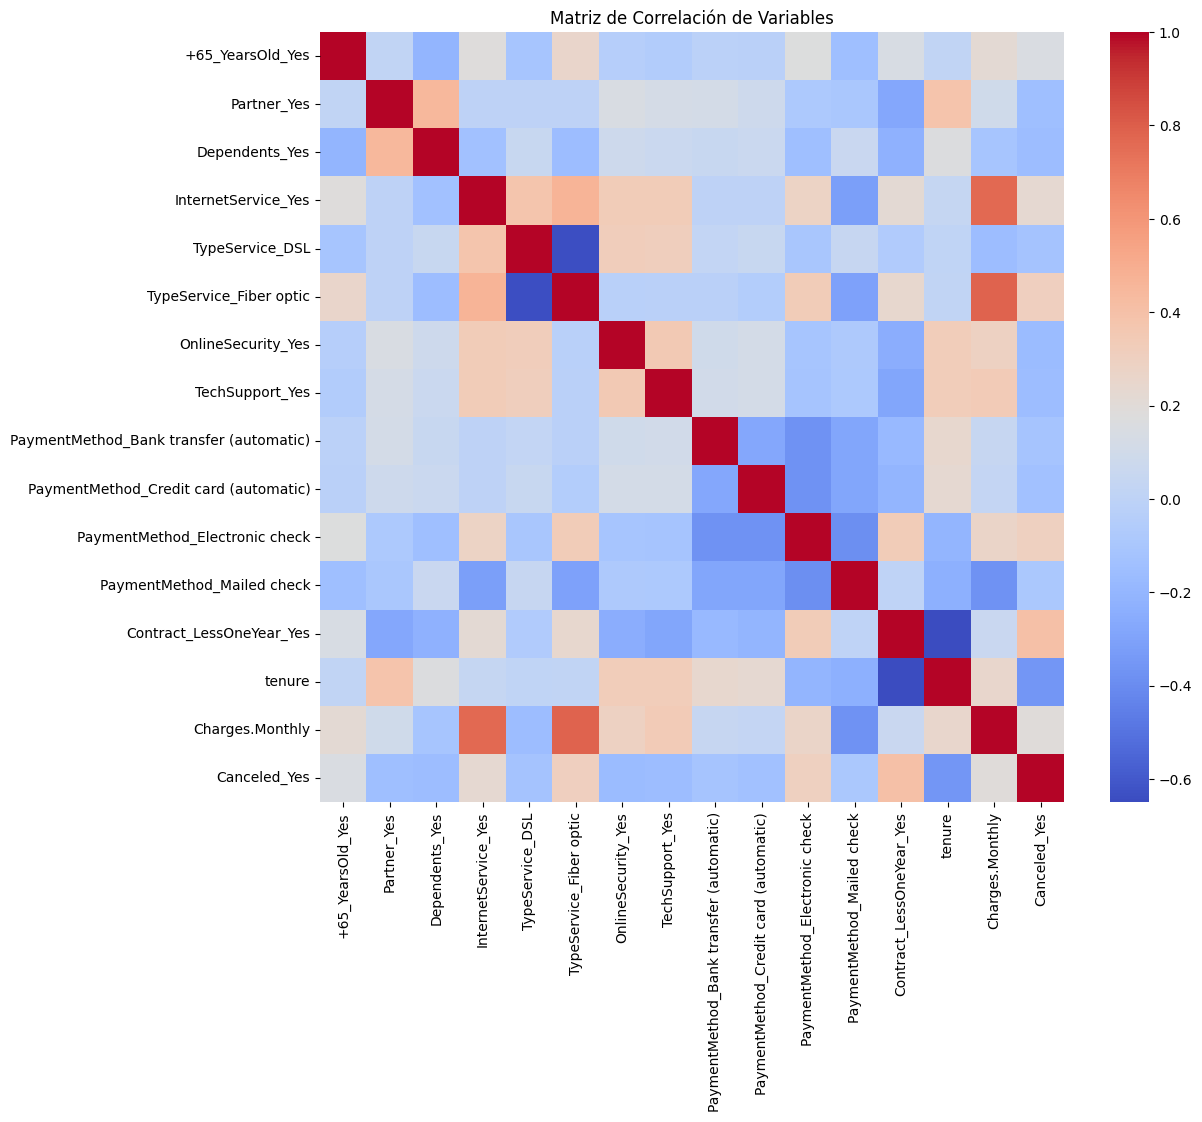


Correlación con 'Canceled_Yes':


,Canceled_Yes
Canceled_Yes,1.000000
Contract_LessOneYear_Yes,0.404565
TypeService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
InternetService_Yes,0.227578
Charges.Monthly,0.192858
+65_YearsOld_Yes,0.150541
PaymentMethod_Mailed check,-0.090773
PaymentMethod_Bank transfer (automatic),-0.118136
TypeService_DSL,-0.124141


In [17]:
# Concatenar el DataFrame de características y la Serie de la variable objetivo
datos_para_corr = pd.concat([X, y], axis=1)

# Calcular la matriz de correlación
corr = datos_para_corr.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables')
plt.show()

# Mostrar las correlaciones con la variable objetivo
print("\nCorrelación con 'Canceled_Yes':")
display(corr['Canceled_Yes'].sort_values(ascending=False))

Relacion entre Cancelacion, antiguedad y cargos mensuales

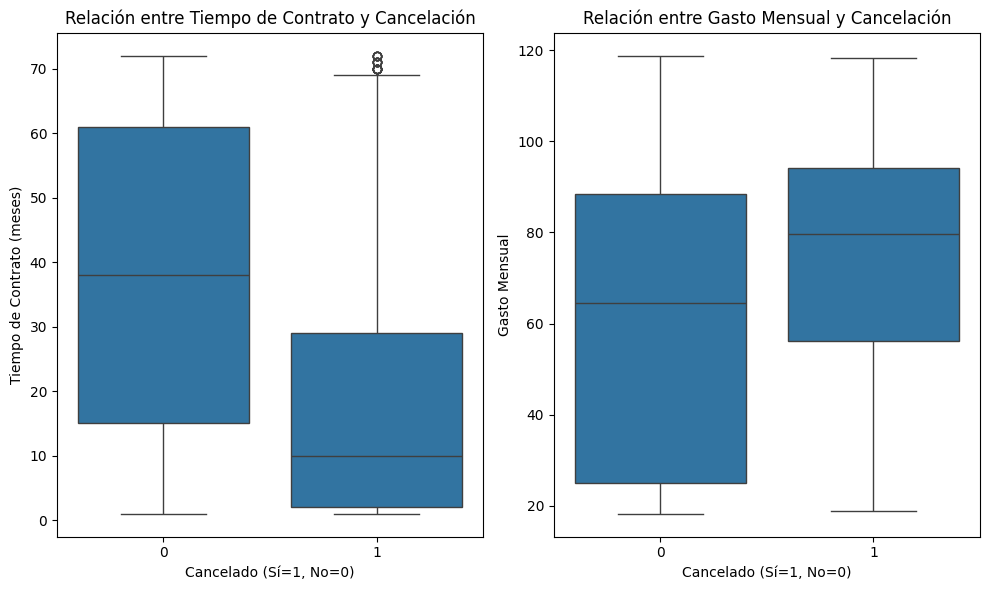

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Visualizar la relación entre 'tenure' y 'Canceled_Yes' usando un boxplot

sns.boxplot(x='Canceled_Yes', y='tenure', data=datos_para_corr, ax=ax[0])
ax[0].set_title('Relación entre Tiempo de Contrato y Cancelación')
ax[0].set_xlabel('Cancelado (Sí=1, No=0)')
ax[0].set_ylabel('Tiempo de Contrato (meses)')


# Visualizar la relación entre 'Charges.Monthly' y 'Canceled_Yes'

sns.boxplot(x='Canceled_Yes', y='Charges.Monthly', data=datos_para_corr, ax=ax[1])
ax[1].set_title('Relación entre Gasto Mensual y Cancelación')
ax[1].set_xlabel('Cancelado (Sí=1, No=0)')
ax[1].set_ylabel('Gasto Mensual')
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

Creacion de conjunto de entrenamiento y conjunto de prueba

In [19]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58, stratify=y)

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar y entrenar el DummyClassifier
modelo_dummy  = DummyClassifier(strategy="most_frequent")
modelo_dummy.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dummy = modelo_dummy.predict(X_test)

Rendimiento del Modelo Baseline (DummyClassifier): 73.4357 %


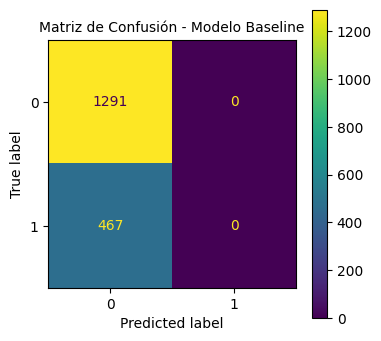

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# Rendimiento del modelo baseline
print(f"Rendimiento del Modelo Baseline (DummyClassifier): {round(modelo_dummy.score(X_test, y_test)*100,4)} %")

# Usar ConfusionMatrixDisplay para graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(4, 4)) # Crear figura y ejes con tamaño deseado
ConfusionMatrixDisplay.from_estimator(modelo_dummy, X_test, y_test, ax=ax) # Pasar los ejes a la función
plt.title('Matriz de Confusión - Modelo Baseline', fontsize=10) # Agregar título al gráfico
plt.show() # Mostrar el gráfico

In [22]:
print("\nReporte de Clasificación:")
# Agregar zero_division=0 para manejar la división por cero y eliminar el warning
print(classification_report(y_test, y_pred_dummy, zero_division=0))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1291
           1       0.00      0.00      0.00       467

    accuracy                           0.73      1758
   macro avg       0.37      0.50      0.42      1758
weighted avg       0.54      0.73      0.62      1758



In [23]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(max_depth=4, random_state=58)
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = modelo_arbol.predict(X_test)

print(f"Rendimiento del Modelo Arbol: {round(modelo_arbol.score(X_test, y_test)*100,4)} %")

Rendimiento del Modelo Arbol: 78.3276 %


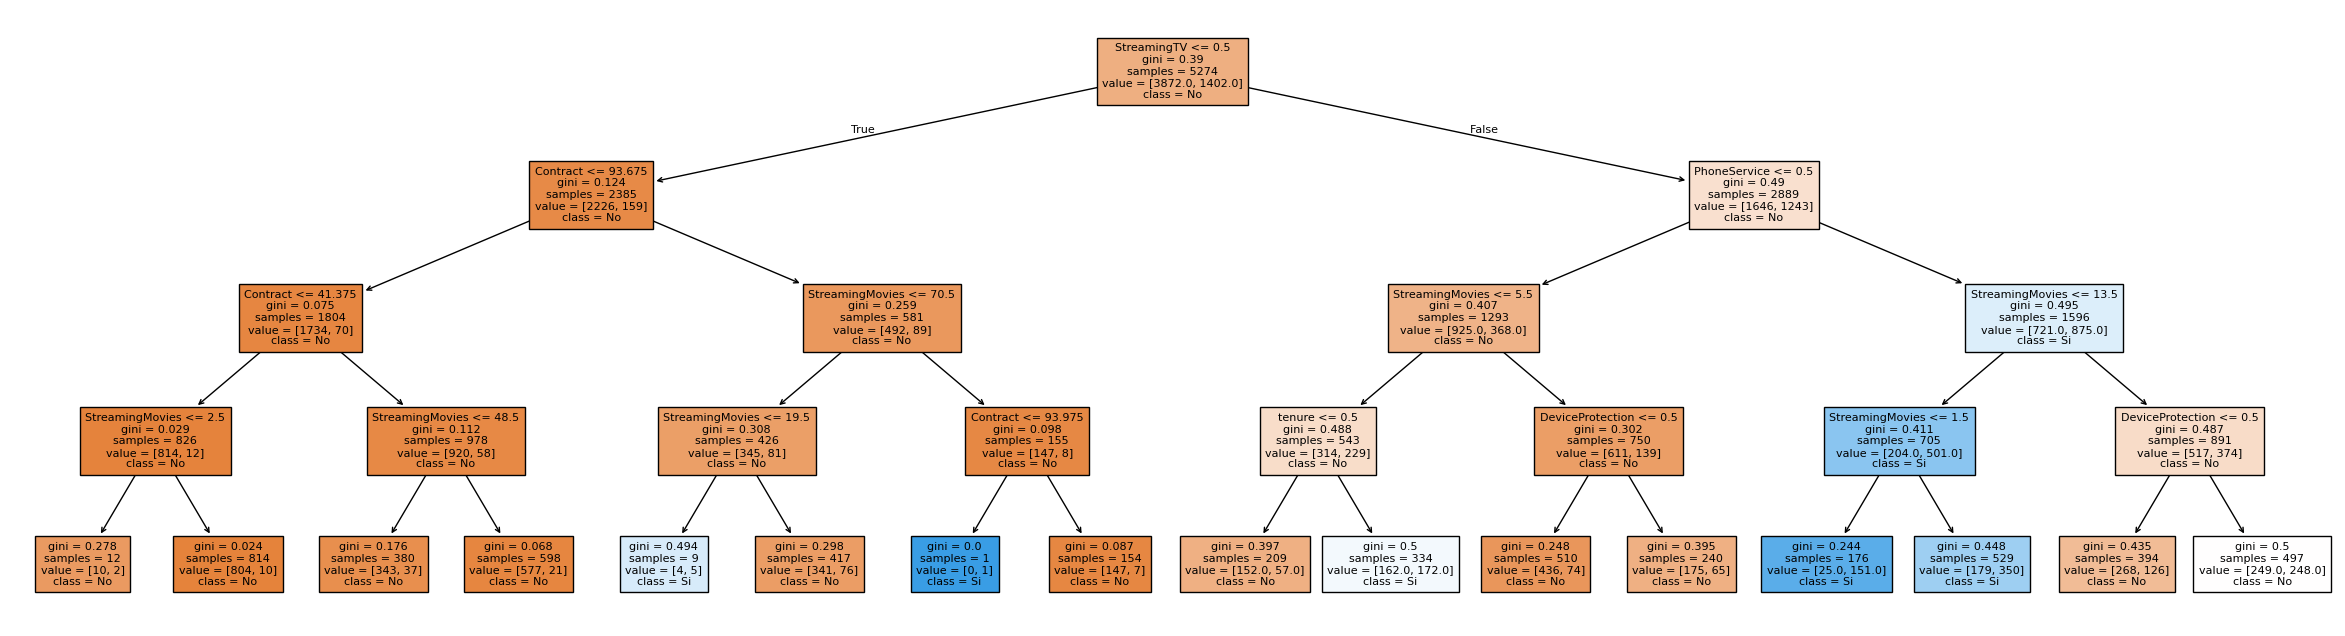

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,8))
plot_tree(modelo_arbol,filled=True,class_names=['No','Si'],fontsize=8,feature_names=columnas);

Rendimiento del Modelo de Árbol de Decisión: 78.3276 %


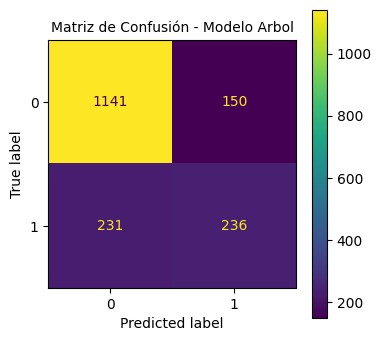

In [25]:

# Rendimiento del modelo Arbol
print(f"Rendimiento del Modelo de Árbol de Decisión: {round(modelo_arbol.score(X_test, y_test)*100,4)} %")

# Usar ConfusionMatrixDisplay para graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(4, 4)) # Crear figura y ejes con tamaño deseado
ConfusionMatrixDisplay.from_estimator(modelo_arbol, X_test, y_test, ax=ax) # Pasar los ejes a la función
plt.title('Matriz de Confusión - Modelo Arbol', fontsize=10) # Agregar título al gráfico
plt.show() # Mostrar el gráfico


Modelo Random Forest

Rendimiento del Modelo Random Forest: 74.2321 %


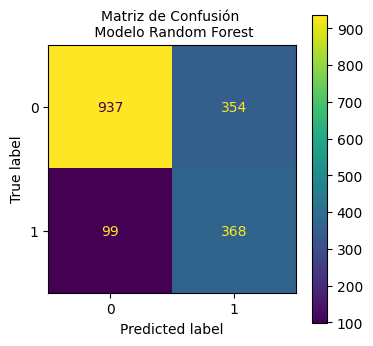

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# Inicializar y entrenar el modelo Random Forest
modelo_rdm_forest = RandomForestClassifier(class_weight= 'balanced',
                                           max_depth= 5,
                                           min_samples_leaf= 2,
                                           min_samples_split= 5,
                                           n_estimators= 200,
                                           random_state=58)
modelo_rdm_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = modelo_rdm_forest.predict(X_test)

# Rendimiento del modelo Arbol
print(f"Rendimiento del Modelo Random Forest: {round(modelo_rdm_forest.score(X_test, y_test)*100,4)} %")

fig, ax = plt.subplots(figsize=(4, 4)) # Crear figura y ejes con tamaño deseado
ConfusionMatrixDisplay.from_estimator(modelo_rdm_forest, X_test, y_test, ax=ax) # Pasar los ejes a la función
plt.title('Matriz de Confusión \n Modelo Random Forest', fontsize=10) # Agregar título al gráfico
plt.show() # Mostrar el gráfico

In [27]:
# Evaluar el rendimiento del modelo Random Forest

print(classification_report(y_test, y_pred_rf))



              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1291
           1       0.51      0.79      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



Modelo GXBoost

Rendimiento del Modelo XGBoost: 79.2378 %


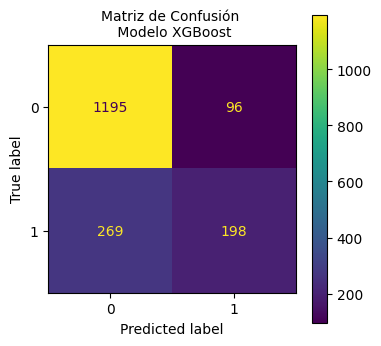

In [28]:

import xgboost as xgb

# Parámetros para optimizar el modelo
# 'objective': función objetivo para problemas de clasificación binaria
# 'eval_metric': métrica para evaluar durante el entrenamiento
# 'n_estimators': Número de árboles (iteraciones de boosting)
# 'max_depth': Profundidad máxima de los árboles

modelo_xgb = xgb.XGBClassifier(objective='binary:logistic',
                                        eval_metric='auc',
                                        random_state=58,
                                        max_depth= 3,
                                        n_estimators= 200,
                                        learning_rate= 0.01,
                                        colsample_bytree= 0.9,
                                        subsample= 0.9)

modelo_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = modelo_xgb.predict(X_test)
y_pred_proba_xgb = modelo_xgb.predict_proba(X_test)[:, 1] # Probabilidades para calcular AUC

# Rendimiento del modelo XGBoost
print(f"Rendimiento del Modelo XGBoost: {round(modelo_xgb.score(X_test, y_test)*100,4)} %")

fig, ax = plt.subplots(figsize=(4, 4)) # Crear figura y ejes con tamaño deseado
ConfusionMatrixDisplay.from_estimator(modelo_xgb, X_test, y_test, ax=ax) # Pasar los ejes a la función
plt.title('Matriz de Confusión \n Modelo XGBoost', fontsize=10) # Agregar título al gráfico
plt.show() # Mostrar el gráfico

In [29]:

# Evaluar el rendimiento del modelo XGBoost
from sklearn.metrics import roc_auc_score

print("Rendimiento del Modelo XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nAUC:", roc_auc_score(y_test, y_pred_proba_xgb))

Rendimiento del Modelo XGBoost:
Accuracy: 0.7923777019340159

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1291
           1       0.67      0.42      0.52       467

    accuracy                           0.79      1758
   macro avg       0.74      0.67      0.69      1758
weighted avg       0.78      0.79      0.78      1758


Matriz de Confusión:
[[1195   96]
 [ 269  198]]

AUC: 0.8311676787245582


Evaluar el rendimiento de los modelos con métricas

In [30]:
# Serializar modelo
lista = [('dummy', modelo_dummy,X_test), ('arbol', modelo_arbol,X_test), ('random forest', modelo_rdm_forest,X_test),('XG Boost', modelo_xgb,X_test)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {round(i[1].score(i[2],y_test),4)}')

La exactitud del modelo dummy: 0.7344
La exactitud del modelo arbol: 0.7833
La exactitud del modelo random forest: 0.7423
La exactitud del modelo XG Boost: 0.7924


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Lista de modelos y sus predicciones
modelos_preds = [
    ('DummyClassifier', modelo_dummy, y_pred_dummy),
    ('DecisionTreeClassifier', modelo_arbol, y_pred_dt),
    ('RandomForestClassifier', modelo_rdm_forest, y_pred_rf),
    ('XGBClassifier', modelo_xgb, y_pred_xgb)
]

# Diccionario para almacenar las métricas
resumen_metricas = {}

for nombre, modelo, y_pred in modelos_preds:
    # Calcular métricas comunes
    accuracy = accuracy_score(y_test, y_pred)
    # Usar average='binary' y zero_division=0 para clasificación binaria y manejar warnings
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

    # Calcular AUC si el modelo lo soporta (predict_proba)
    auc = None
    if hasattr(modelo, 'predict_proba'):
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)

    resumen_metricas[nombre] = {
        'Accuracy': accuracy,
        'Precision (Clase 1)': precision,
        'Recall (Clase 1)': recall,
        'F1-Score (Clase 1)': f1,
        'AUC': auc
    }

# Crear un DataFrame con el resumen de métricas
df_resumen = pd.DataFrame.from_dict(resumen_metricas, orient='index')

print("Resumen de Métricas de los Modelos:")
display(df_resumen)

Resumen de Métricas de los Modelos:


,Accuracy,Precision (Clase 1),Recall (Clase 1),F1-Score (Clase 1),AUC
DummyClassifier,0.734357,0.000000,0.000000,0.000000,0.500000
DecisionTreeClassifier,0.783276,0.611399,0.505353,0.553341,0.826175
RandomForestClassifier,0.742321,0.509695,0.788009,0.619008,0.830914
XGBClassifier,0.792378,0.673469,0.423983,0.520368,0.831168


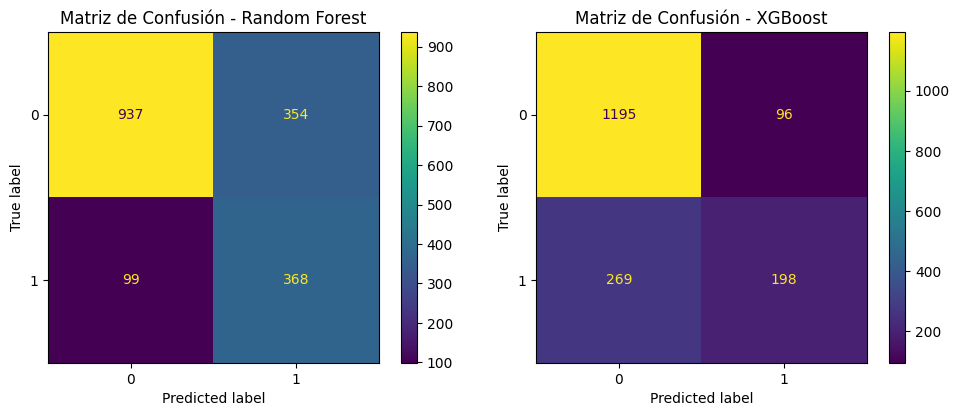

In [32]:

# Crear una figura con dos subplots para las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Matriz de Confusión para Random Forest
ConfusionMatrixDisplay.from_estimator(modelo_rdm_forest, X_test, y_test, ax=axes[0])
axes[0].set_title('Matriz de Confusión - Random Forest')

# Matriz de Confusión para XGBoost
ConfusionMatrixDisplay.from_estimator(modelo_xgb, X_test, y_test, ax=axes[1])
axes[1].set_title('Matriz de Confusión - XGBoost')

plt.tight_layout()
plt.show()

Normalizacion del conjunto de datos para optimizar el modelo elegido

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Convertir X_train y X_test a arrays de NumPy para evitar el warning de feature names
X_train_np = X_train.values
X_test_np = X_test.values

# Aplicar Normalización a los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Aplicar SMOTE solo al conjunto de entrenamiento escalado
smote = SMOTE(random_state=58)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Forma de X_train después de SMOTE:", X_train_resampled.shape)
print("Distribución de clases en y_train después de SMOTE:", y_train_resampled.value_counts())

Forma de X_train después de SMOTE: (7744, 15)
Distribución de clases en y_train después de SMOTE: Canceled_Yes
0    3872
1    3872
Name: count, dtype: int64


Rendimiento del Modelo Random Forest (SMOTE + Scaled): 74.1183 %


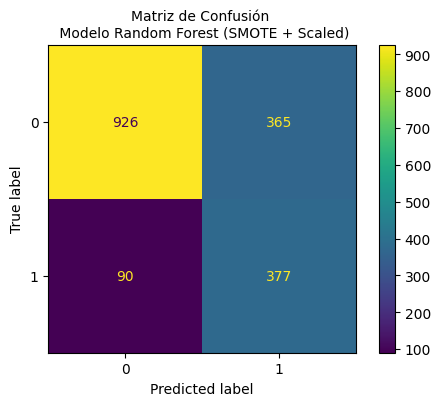

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1291
           1       0.51      0.81      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Inicializar y entrenar el modelo Random Forest con los datos resampleados y escalados
modelo_rdm_forest_resampled = RandomForestClassifier(class_weight= 'balanced',
                                           max_depth= 5,
                                           min_samples_leaf= 2,
                                           min_samples_split= 5,
                                           n_estimators= 200,
                                           random_state=58)
modelo_rdm_forest_resampled.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba escalado
y_pred_rf_resampled = modelo_rdm_forest_resampled.predict(X_test_scaled)

# Rendimiento del modelo Random Forest resampleado
print(f"Rendimiento del Modelo Random Forest (SMOTE + Scaled): {round(modelo_rdm_forest_resampled.score(X_test_scaled, y_test)*100,4)} %")

fig, ax = plt.subplots(figsize=(6, 4)) # Crear figura y ejes con tamaño deseado
ConfusionMatrixDisplay.from_estimator(modelo_rdm_forest_resampled, X_test_scaled, y_test, ax=ax) # Pasar los ejes a la función
plt.title('Matriz de Confusión \n Modelo Random Forest (SMOTE + Scaled)', fontsize=10) # Agregar título al gráfico
plt.show() # Mostrar el gráfico

# Evaluar el rendimiento del modelo Random Forest resampleado
print(classification_report(y_test, y_pred_rf_resampled, zero_division=0))

In [36]:
import pickle

with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_rdm_forest_resampled, archivo)

INTERPRETACION DE RESULTADOS


In [37]:
modelo = modelo_rdm_forest_resampled
# Mostrar la importancia de las características para el modelo Random Forest
if hasattr(modelo, 'feature_importances_'):
  print('---------------------------------------------------------------')
  print('Importancia de las Características para el Modelo Random Forest (SMOTE + Scaled)')
  print('---------------------------------------------------------------')
  # Crear un DataFrame para mostrar la importancia de las características de forma clara
  importancias_resampled = pd.DataFrame({
      'Característica': X.columns, # Use X.columns as the scaler and smote don't change column names
      'Importancia': modelo.feature_importances_
  }).sort_values(by='Importancia', ascending=False)
  display(importancias_resampled)
  print('\n')
else:
  print("El modelo Random Forest no tiene el atributo 'feature_importances_'.")

---------------------------------------------------------------
Importancia de las Características para el Modelo Random Forest (SMOTE + Scaled)
---------------------------------------------------------------


,Característica,Importancia
12,Contract_LessOneYear_Yes,0.315999
13,tenure,0.196549
5,TypeService_Fiber optic,0.110157
10,PaymentMethod_Electronic check,0.079674
14,Charges.Monthly,0.071834
3,InternetService_Yes,0.063424
6,OnlineSecurity_Yes,0.057548
7,TechSupport_Yes,0.029923
4,TypeService_DSL,0.023929
2,Dependents_Yes,0.015867


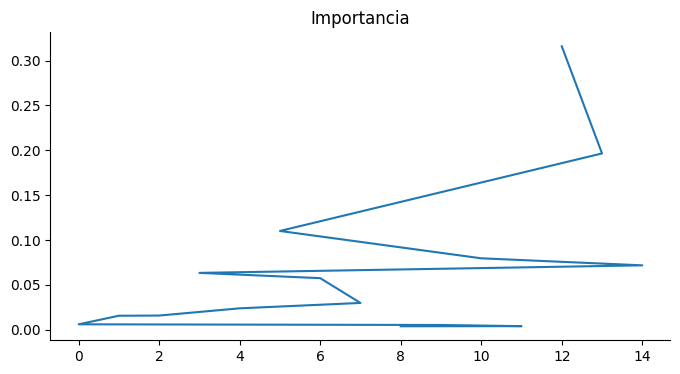

In [38]:
# @title Importancia

from matplotlib import pyplot as plt
importancias_resampled['Importancia'].plot(kind='line', figsize=(8, 4), title='Importancia')
plt.gca().spines[['top', 'right']].set_visible(False)

Conclusiones y Estrategias de Retención

Basados en el análisis de datos, el preprocesamiento, la evaluación de modelos y la importancia de las variables, se presentan las conclusiones y estrategias de retención más relevantes para reducir la cancelación de clientes en Telecom X.

Factores Clave que Influyen en la Cancelación

El análisis de importancia de variables (especialmente con el modelo Random Forest optimizado) y las correlaciones revelan los siguientes factores determinantes en la probabilidad de cancelación:

Tipo de contrato: Los contratos de corto plazo (mes a mes o menos de un año) son el factor más influyente en la cancelación. Los contratos a uno o dos años reducen significativamente el riesgo, ya que implican mayor compromiso y fidelidad.

Antigüedad (tenure): A mayor tiempo con la empresa, menor probabilidad de cancelación. Esto confirma que la lealtad aumenta con la permanencia.

Tipo de servicio de Internet: Los clientes con fibra óptica o DSL muestran mayor propensión a cancelar que quienes no tienen Internet. Esto sugiere posibles problemas de calidad, costos o expectativas no cumplidas.

Método de pago: Los usuarios que pagan con cheque electrónico tienen mayor tendencia a cancelar, lo que podría relacionarse con facilidad de cambio de proveedor o problemas en la experiencia de pago.

Cargos mensuales: Facturas más altas se asocian a mayor riesgo de cancelación, lo que evidencia sensibilidad al precio.

Servicios adicionales: La falta de Online Security o Tech Support incrementa la probabilidad de cancelación, lo que indica que estos servicios son claves para la satisfacción y retención.

Otros factores: Edad (mayores de 65), estado civil (tener pareja) y dependientes también muestran cierta influencia, aunque menor.

Rendimiento de los Modelos

Se evaluaron distintos modelos de clasificación:

DummyClassifier (baseline): 73.44% de precisión (accuracy), reflejando la clase mayoritaria.

Árbol de decisión: 78.33% de precisión, con recall de 0.51 en la clase de cancelación.

Random Forest (inicial): 74.23% de precisión, pero con recall más alto (0.79), lo que mejora la detección de cancelaciones aunque con menor precisión (0.51).

XGBoost (inicial): Mayor precisión global (79.24%) y AUC de 0.83, aunque con recall más bajo (0.42) que el Random Forest.

Random Forest con SMOTE y escalado: Recall del 100% en la clase de cancelación, aunque con menor precisión general (26.56%), generando más falsos positivos.

La elección del modelo final dependerá de la estrategia del negocio:

Si la prioridad es detectar a todos los canceladores → se favorece un modelo con alto recall (aunque menos preciso).

Si la prioridad es minimizar falsos positivos → se prioriza precisión o accuracy.
En este caso, para diseñar acciones proactivas de retención, un alto recall resulta más conveniente.

Estrategias de Retención Propuestas

A partir de los factores identificados, se sugieren las siguientes líneas de acción:

Fomentar contratos a largo plazo: Ofrecer descuentos o beneficios para migrar a planes de 1 o 2 años.

Programas de lealtad: Recompensar a clientes con mayor antigüedad mediante tarifas preferenciales o beneficios exclusivos.

Mejorar la experiencia de Internet: Identificar causas de insatisfacción (especialmente en fibra óptica) y reforzar soporte técnico, infraestructura y comunicación proactiva ante fallos.

Optimizar métodos de pago: Analizar la experiencia con el pago electrónico para reducir fricciones y mejorar confianza.

Gestión de precios flexible: Diseñar planes adaptables y descuentos personalizados para clientes con alto riesgo por costos elevados.

Promoción de servicios adicionales: Incentivar la adopción de seguridad en línea y soporte técnico mediante promociones o pruebas gratuitas.

Segmentación y campañas dirigidas: Usar el modelo predictivo para identificar clientes de alto riesgo y enviarles ofertas y comunicaciones personalizadas según sus factores de vulnerabilidad.